# 1) Importing Libraries

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [136]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2) Importing Data

In [137]:
# Creating path variable
path = r'C:\Users\Aaron\CareerFoundry\Achievement 6'

In [138]:
# Importing MLB Salaries dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salaries_Task64.csv'), index_col = False)

In [139]:
# Checking our data
df.head()

,Unnamed: 0,salary,name,total_value,pos,length,year_start,avg_annual,team,city,state,country
0,0,6500000,Giancarlo Stanton,325000000,RF,13,2015,25000000,MIA,Miami,Florida,USA
1,1,21943026,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
2,2,22000000,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
3,3,28000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA
4,4,33000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA


## Removing Columns

In [140]:
columns_to_drop = ['Unnamed: 0', 'name', 'pos', 'year_start', 'team', 'city', 'state', 'country']

In [141]:
df = df.drop(columns = columns_to_drop)

In [142]:
# Checking new data
df.head()

,salary,total_value,length,avg_annual
0,6500000,325000000,13,25000000
1,21943026,292000000,10,29200000
2,22000000,292000000,10,29200000
3,28000000,275000000,10,27500000
4,33000000,275000000,10,27500000


## Standardizing Data via Standard Scaler

In [143]:
# Define Standard Scaler
scaler = StandardScaler()

In [144]:
# Transform the data
df_array = scaler.fit_transform(df)

In [145]:
# Check data
df_array

array([[ 1.29677654, 22.57766209, 15.80207575,  6.5997913 ],
       [ 5.90290822, 20.25869713, 11.80967811,  7.81527472],
       [ 5.91990163, 20.25869713, 11.80967811,  7.81527472],
       ...,
       [-0.62331171, -0.25623714, -0.16751483, -0.61714156],
       [-0.62331171, -0.25623714, -0.16751483, -0.61714156],
       [-0.62331171, -0.25623714, -0.16751483, -0.61714156]])

## Turning Array into DataFrame

In [146]:
# Renaming columns to original names
column_names = ['salary', 'total_value', 'length', 'avg_annual']

In [147]:
df = pd.DataFrame(df_array, columns = column_names)

In [148]:
# Checking data
df

,salary,total_value,length,avg_annual
0,1.296777,22.577662,15.802076,6.599791
1,5.902908,20.258697,11.809678,7.815275
2,5.919902,20.258697,11.809678,7.815275
3,7.709498,19.064079,11.809678,7.323293
4,9.200829,19.064079,11.809678,7.323293
...,...,...,...,...
22700,-0.623312,-0.256237,-0.167515,-0.617142
22701,-0.623312,-0.256237,-0.167515,-0.617142
22702,-0.623312,-0.256237,-0.167515,-0.617142
22703,-0.623312,-0.256237,-0.167515,-0.617142


# 3) Elbow Technique

In [149]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [150]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-90820.00000001104,
 -49767.11411690157,
 -26012.44019395976,
 -18143.109228672765,
 -12348.17050038336,
 -10242.522252897263,
 -8404.837334993925,
 -7053.417158650289,
 -6213.880875022175]

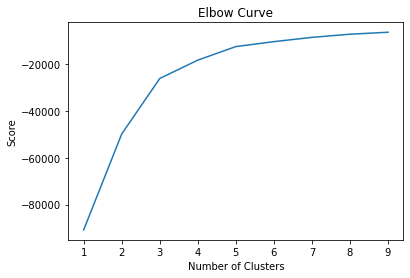

In [151]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4) Decide the Number of Clusters

#### There's a large jump from 2 to 3 on the x-axis, but after that, the curve straightens out. This means our optimal count of clusters is 3.

# 5) k-means algorithm

In [152]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)


In [153]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

# 6) New Column for Clusters

In [157]:
df['clusters'] = kmeans.fit_predict(df)

In [158]:
df.head()

,salary,total_value,length,avg_annual,clusters
0,1.296777,22.577662,15.802076,6.599791,2
1,5.902908,20.258697,11.809678,7.815275,2
2,5.919902,20.258697,11.809678,7.815275,2
3,7.709498,19.064079,11.809678,7.323293,2
4,9.200829,19.064079,11.809678,7.323293,2


In [159]:
df['clusters'].value_counts()

0    19521
1     2891
2      293
Name: clusters, dtype: int64

# 7) Scatterplots with Clustered Data

### Length vs. Avg_Annual

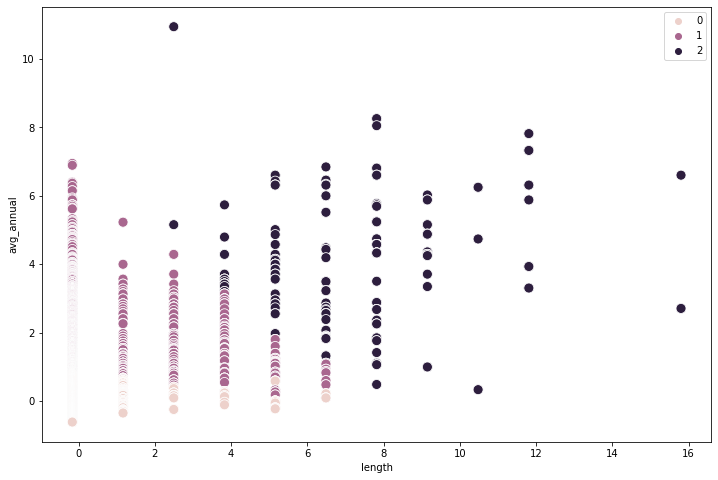

In [160]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['length'], y=df['avg_annual'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('length') # Label x-axis.
plt.ylabel('avg_annual') # Label y-axis.
plt.show()

### Length vs. Total Value

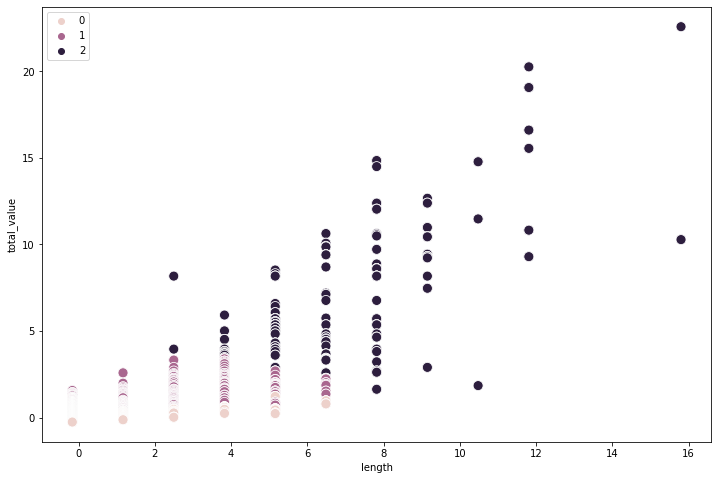

In [161]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['length'], y=df['total_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('length') # Label x-axis.
plt.ylabel('total_value') # Label y-axis.
plt.show()

# 8) Discuss Clusters

#### Length vs. Avg Annual


We can seee three clusters, with two of them being very close to one another. Cluster 0 (pink) and cluster 1 (purple) takes up the left portion of the chart. This could mean that players who opt for shorter contracts typically make more money on average every year.

As the contracts get longer, it seems to be more spread out. Some of the longest contracts aren't even the highest annual averages. And there are also some, namely the outlier on the top of the chart, that get paid the highest annual average, while also having the shortest contract within that cluster.

#### Length vs. Total Value

We can see that cluster 0 (pink) and cluster 1 (purple) take up the bottom left portions of the chart again. This time, however, it looks like there is a correlation between how much the total value of a contract is, and the length of the contract.

Short term contracts, such as those in cluster 0 and 1, in total value make less than those within cluster 2.

As contracts in cluster 0 and 1 get longer, we start to see those contracts' total value begin to decrease

Additionally, as the length of contracts get longer, we start to see a mixture of cluster 2's contracts begin to increase, as well as decrease, until we hit above length 11 where all the data have relatively high total values.

# 9) Descriptive Statistics

In [162]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [163]:
df.groupby('cluster').agg({'salary':['mean', 'median'], 
                         'total_value':['mean', 'median'], 
                         'length':['mean', 'median'],
                          'avg_annual':['mean', 'median']})

salary           total_value              length            \
                 mean    median        mean    median      mean    median   
cluster                                                                     
dark purple  3.466825  3.533773    7.223525  5.712462  7.163236  6.486481   
pink        -0.330470 -0.492820   -0.183977 -0.225493 -0.146449 -0.167515   
purple       1.880087  1.588472    0.510180  0.308571  0.262889 -0.167515   

            avg_annual            
                  mean    median  
cluster                           
dark purple   4.002840  3.995184  
pink         -0.331860 -0.490529  
purple        1.835149  1.535277

We can see that dark purple has the highest salary, total values, and average annuals, while also having the longest contracts.

Those with the shortest contracts (pink), make less overall, and surpisingly to me, also make the least on annual averages.

Puprple has middle ground for all variables, except for length of contract where they both have short/medium term contracts.

# 10) Propose what these results could be useful for

These results would be very helpful for MLB teams, players, and agents when it comes to negotiating contracts. Understanding the breakdown of previous contracts allows everyone to compare and make better informed decisions.

We learned that there is a sweet spot for short/medium length contracts where they get paid the most (in total value of the contract), and why that same spot isn't ideal for long term contracts.

We also learned that when seeking to make the most on average annually, a player is better off with a short term contracts.